Atalov S.

Fundamentals of Machine Learning and Artificial Intelligence

---

## Lab 5: Predicting Customer Churn in Banking

<div>
<img src="attachment:image.png" width="300"/>
</div>




### Objective
Develop a machine learning model to predict whether a bank customer will churn based on their profile and banking activity.

### Dataset Description
The dataset contains details of bank customers along with whether they have churned. Each record includes the following attributes:

- **Customer ID**: A unique identifier for each customer.
- **Surname**: The customer's surname.
- **Credit Score**: A numerical value representing the customer's creditworthiness.
- **Geography**: The customer's country (France, Spain, or Germany).
- **Gender**: The customer's gender (Male or Female).
- **Age**: The customer's age.
- **Tenure**: How long the customer has been with the bank (in years).
- **Balance**: The amount of money available in the customer's bank account.
- **NumOfProducts**: How many banking products the customer uses.
- **HasCrCard**: Indicates whether the customer has a credit card (1 = Yes, 0 = No).
- **IsActiveMember**: Indicates whether the customer is an active member (1 = Yes, 0 = No).
- **EstimatedSalary**: The estimated salary of the customer.
- **Exited**: Whether the customer has churned (1 = Yes, 0 = No).

### Tasks

1. **Data Preprocessing**: Clean the data if necessary and perform any required transformations.
2. **Exploratory Data Analysis**: Provide a statistical summary of the variables and visualize the relationships between features.
3. **Feature Engineering**: Generate new features if necessary and select appropriate features for building the model.
4. **Model Building**: Train at least two different classifiers to predict customer churn.
5. **Model Evaluation**: Evaluate your models using accuracy, recall and F1-score.
6. **Model Selection**: Compare the performance of the models and select the best one based on the evaluation metrics.

### Deliverables
Submit a Jupyter Notebook containing all the steps from data preprocessing to model evaluation and selection and **csv** file with predictions on test data. Include comments and explanations of your code and decisions.

---

This exercise encourages hands-on practice with the full data science process from data cleaning to model evaluation, using a real-world dataset.

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np

## 1. **Data Preprocessing**: Clean the data if necessary and perform any required transformations.

In [3]:
df = pd.read_csv("bank_data\\train.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'bank_data\\train.csv'

In [10]:
df = df.drop(columns=['Surname','CustomerId','id'])

In [11]:
numerical_cols = [ ]
categorical_cols = [ "Geography","Gender"]

In [12]:
def one_hot_encoder(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """Категорийные данные в численные"""
    df = df.copy()
    # Убираем численные столбцы - их не трогаем
    df_num = df.drop(columns = columns)
    
    # В датафрейме оставляем только категорийные столбцы
    df = df[columns].copy()
    
    # Новый датафрейм который будем возвращать
    df_prep = pd.DataFrame()
    
    for column in df.columns:
        # Уникальные значения столбца
        unique_values = df[column].unique()
        # Если уникальных значений меньше 2, то просто replace
        if len(unique_values) <= 2:
            df_prep[column] = df[column]
            for i in range(len(unique_values)):
                df_prep[column] = df_prep[column].replace({unique_values[i]: i})
        else: # Иначе get_dummies
            dummies = pd.get_dummies( df[column], prefix=column )
            df_prep = pd.concat([df_prep, dummies], axis=1)
    
    # Соединяем численные и категорийные столбцы
    return pd.concat([df_num, df_prep], axis=1)

In [13]:
df = one_hot_encoder( df, categorical_cols )

C:\Users\User\AppData\Local\Temp\ipykernel_18720\4234366376.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_prep[column] = df_prep[column].replace({unique_values[i]: i})


In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,False,False,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,False,False,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,False,False,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,False,False,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131996,581,33.0,1,77253.22,2,1.0,0.0,194239.63,0,False,False,True,0
131997,545,38.0,9,0.00,1,1.0,0.0,97633.93,0,False,False,True,1
131998,598,45.0,8,132932.11,1,0.0,1.0,142839.13,1,False,True,False,0
131999,833,32.0,2,124545.68,1,1.0,1.0,50267.88,0,True,False,False,0


## 2. **Exploratory Data Analysis**: Provide a statistical summary of the variables and visualize the relationships between features.

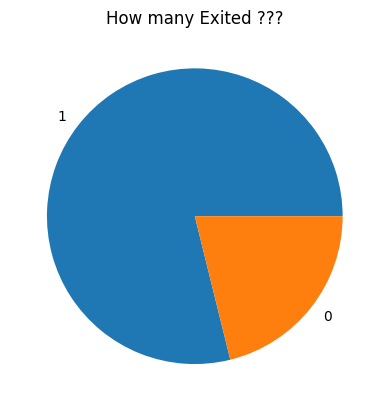

In [16]:
plt.pie(df['Exited'].value_counts(), labels=[1, 0]);
plt.title('How many Exited ???');

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4 

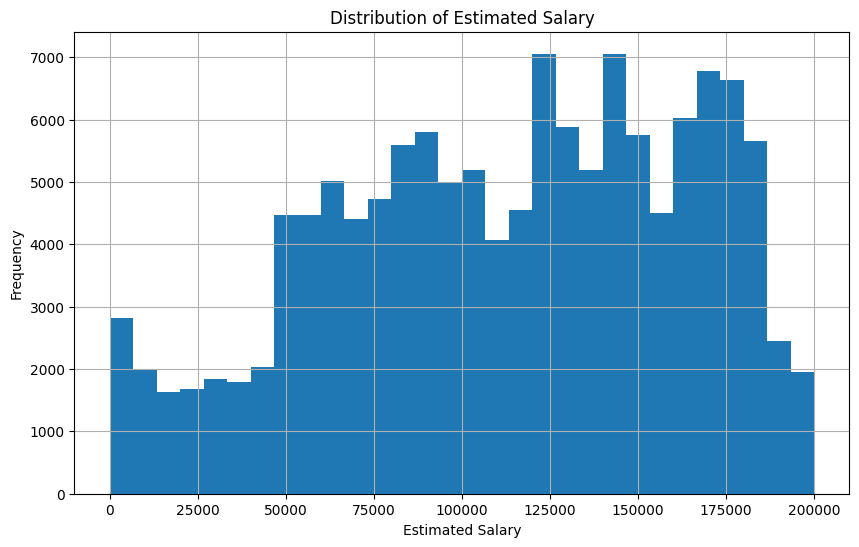

ValueError: could not convert string to float: 'Okwudilichukwu'

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to load and analyze the data
def explore_data(file_path):
    # Load the data
    df = pd.read_csv(file_path)
    
    # Display the first few rows of the dataframe
    print(df.head())
    
    # Statistical summary of numerical columns
    num_cols = ['Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
    print("\nStatistical Summary of Numerical Columns:")
    for col in num_cols:
        print(f"{col}: {df[col].describe()}")

    # Check for missing values
    print("\nMissing Values Count:")
    print(df.isnull().sum())

    # Visualize the distribution of Estimated Salary
    plt.figure(figsize=(10, 6))
    df['EstimatedSalary'].hist(bins=30)
    plt.title("Distribution of Estimated Salary")
    plt.xlabel("Estimated Salary")
    plt.ylabel("Frequency")
    plt.show()

    # Correlation matrix heatmap
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# Assuming the file path is correct and the file is named 'data.csv'
file_path = "bank_data/train.csv"
explore_data(file_path)


In [20]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
count,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000
mean,656.493974,38.115816,5.022689,55381.189420,1.554875,0.754479,0.497299,112635.055533,0.211407,0.436686
std,80.022014,8.840388,2.808411,62776.097527,0.547437,0.430397,0.499995,50293.894746,0.408308,0.495977
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000
25%,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74800.990000,0.000000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,118045.980000,0.000000,0.000000
75%,710.000000,42.000000,7.000000,119794.670000,2.000000,1.000000,1.000000,155639.760000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000


In [22]:
df.corr()['Exited']

CreditScore         -0.026540
Age                  0.342607
Tenure              -0.018658
Balance              0.129946
NumOfProducts       -0.213398
HasCrCard           -0.022438
IsActiveMember      -0.210020
EstimatedSalary      0.018721
Exited               1.000000
Geography_France    -0.132175
Geography_Germany    0.213121
Geography_Spain     -0.051623
Gender               0.148358
Name: Exited, dtype: float64

## 3. **Feature Engineering**: Generate new features if necessary and select appropriate features for building the model.

In [119]:
df['Novoe_colonka'] = df['Age']/df['NumOfProducts']+1
df['Novoe_colonka1'] = df['Age']/df['Gender']+1
df['Novoe_colonka2'] = df['Age']/df['Geography_Germany'].replace({np.inf:df['Novoe_colonka2'].mean()})

In [120]:
df.corr()['Exited']

CreditScore         -0.026540
Age                  0.342607
Tenure              -0.018658
Balance              0.129946
NumOfProducts       -0.213398
HasCrCard           -0.022438
IsActiveMember      -0.210020
EstimatedSalary      0.018721
Exited               1.000000
Geography_France    -0.132175
Geography_Germany    0.213121
Geography_Spain     -0.051623
Gender               0.148358
Novoe_colonka        0.413172
Novoe_colonka1       0.369227
Novoe_colonka2       0.390261
Name: Exited, dtype: float64

In [121]:
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender               0
Novoe_colonka        0
Novoe_colonka1       0
Novoe_colonka2       0
dtype: int64

In [126]:
df= df.drop(columns=['Novoe_colonka','Novoe_colonka1','Novoe_colonka2'])

## 4. **Model Building**: Train at least two different classifiers to predict customer churn.

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
X = df.copy()
y = X.pop('Exited')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Random Forest**

In [162]:
random = RandomForestClassifier(n_estimators = 120,min_samples_split = 5, max_depth= 13)
random.fit(X_train,y_train)

RandomForestClassifier(max_depth=13, min_samples_split=5, n_estimators=120)

In [158]:
list_n_estimators = [10, 30, 50, 70, 100, 120, 150, 200, 300]
list_max_depth = [1, 2, 4, 6, 8, 10, 13, 17, 20, None]
list_min_samples_split = [2, 3, 5, 7, 9, 11, 15]
frid = {'n_estimators': list_n_estimators,
        'max_depth': list_max_depth,
        'min_samples_split': list_min_samples_split}
Randomi = RandomizedSearchCV(
    estimator=random,
    param_distributions=frid,
    scoring='f1',  # You can change this to 'roc_auc', 'precision', 'recall', etc. as per your requirement
    cv=5,  # Number of cross-validation folds
    verbose=1, # Print progress
    n_jobs=-1  # Use all available cores
)

In [159]:
Randomi.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 4, 6, 8, 10, 13, 17,
                                                      20, None],
                                        'min_samples_split': [2, 3, 5, 7, 9, 11,
                                                              15],
                                        'n_estimators': [10, 30, 50, 70, 100,
                                                         120, 150, 200, 300]},
                   scoring='f1', verbose=1)

In [160]:
Randomi.best_params_

{'n_estimators': 120, 'min_samples_split': 5, 'max_depth': 13}

In [163]:
random.score(X_train,y_train) ,  random.score(X_test,y_test)

(0.8929734848484848, 0.8628461043142305)

In [164]:
print(random.score(X_train,y_train) - random.score(X_test,y_test))

0.030127380534254344


**KNN**

In [148]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [149]:
knn.score(X_train,y_train) ,  knn.score(X_test,y_test)

(0.8128598484848485, 0.7586076284989205)

**Logistic Regression**

In [150]:
logic = LogisticRegression()
logic.fit(X_train,y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [151]:
logic.score(X_train,y_train) ,  logic.score(X_test,y_test)

(0.7925757575757576, 0.7956895572137419)

## 5. **Model Evaluation**: Evaluate your models using accuracy, precision, recall and F1-score.

In [165]:
y_pred1 = random.predict(X_test)
recall_score(y_test,y_pred1),precision_score(y_test,y_pred1),accuracy_score(y_test, y_pred1),f1_score(y_test, y_pred1, average='weighted')

(0.5224668000727669, 0.7425025853154085, 0.8628461043142305, 0.853489263114586)

In [153]:
y_pred2 = knn.predict(X_test)
recall_score(y_test,y_pred2),precision_score(y_test,y_pred2),accuracy_score(y_test, y_pred2),f1_score(y_test, y_pred2, average='weighted')

(0.11478988539203201,
 0.2951356407857811,
 0.7586076284989205,
 0.7144836189189991)

In [154]:
y_pred3 = logic.predict(X_test)
recall_score(y_test,y_pred3),precision_score(y_test,y_pred3),accuracy_score(y_test, y_pred3),f1_score(y_test, y_pred3, average='weighted')

(0.15517555030016372,
 0.5321272613849033,
 0.7956895572137419,
 0.7483665027657558)

## 6. **Model Selection**: Compare the performance of the models and select the best one based on the evaluation metrics.

In [ ]:
#RandomForestClassifier

## 7. Making Predictions: Using best model make a predictions on test data.

In [177]:
df_test = pd.read_csv("bank_data/test.csv")

In [178]:
df_test = df_test.drop(columns=['Surname','CustomerId','id'])

In [179]:
df_test = one_hot_encoder( df_test, categorical_cols )

C:\Users\User\AppData\Local\Temp\ipykernel_18720\4234366376.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_prep[column] = df_prep[column].replace({unique_values[i]: i})


In [180]:
df_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender
0,693,41.0,9,181461.48,3,1.0,1.0,187929.43,False,True,False,0
1,537,38.0,1,122214.00,1,1.0,0.0,88965.46,True,False,False,1
2,445,28.0,4,0.00,2,1.0,0.0,180134.88,True,False,False,1
3,743,38.0,1,145843.47,2,1.0,0.0,56794.02,False,True,False,0
4,695,58.0,5,0.00,2,0.0,1.0,102763.69,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33028,667,33.0,2,0.00,1,1.0,1.0,131834.75,False,False,True,0
33029,792,35.0,3,0.00,1,0.0,0.0,131834.45,True,False,False,1
33030,565,31.0,5,0.00,1,1.0,1.0,127429.56,True,False,False,1
33031,554,30.0,7,161533.00,1,0.0,1.0,71173.03,False,False,True,0


In [181]:
random.predict(df_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [182]:
y_pred = random.predict(df_test)

df_predictions = pd.DataFrame({'my_prediction': y_pred})

df_predictions.to_csv('Kalbaev_Tomas.csv', index=False)

## 8. What is the main reason of customer churn? How to analyze this?

In [183]:
print("Hello World")

Hello World


## Можно найти корреляцию относительно y, найти наиболее коррелирующие значения именно они являются главной причиной ухода клиентов 